# Danone Hackaton Challenge
**Autor:** Axel Daniel Malváez Flores  
**LinkedIn:** https://www.linkedin.com/in/daniel-malvaez-821637233/    
**Date:** June 17th, 2023 - June19th, 2023

This notebook will adress the data science challenge for Danone Hackaton. I decided to use a FNN (feedfordward neural network) and XGBoost (Xtrem Gradient Boosted Tree) to compare its performance.

In [1]:
# Necessary libraries for the first part of my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
data_train = pd.read_json('train_products.json')
data_test = pd.read_json('test_products.json')

data_train = data_train.T
data_test = data_test.T

In [3]:
data_train.head()

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,unknown,...,b,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.1234,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,unknown,...,e,"[en:cardboard, en:plastic]",1,1.772009,0,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,...,d,"[en:paperboard, en:plastic]",1,2.2396,0,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,unknown,...,e,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,unknown,...,unknown,"[en:glass, en:plastic, en:unknown]",0,7.918371,0,0.015709,0.47839,0.445327,0.334988,4


In [4]:
data_test.head()

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,sugars_100g,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,Activia saveur coco x 4,"Danone,Activia",unknown,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:belgium, en:france]","{'en:european-union': 50, 'en:france': 50}","[{'id': 'en:whole-milk', 'percent_estimate': '...",0,unknown,...,13.1,b,[en:plastic],1,0.86833498,0.0066875618,0.03557378,0.17703201,0.16833754,0.2016675
1,Danup peche melba,Danone,unknown,"[en:plant-based-foods-and-beverages, en:bevera...",1,[en:tunisia],{'en:unknown': 100},unknown,unknown,unknown,...,unknown,unknown,[en:unknown],1,0.091306974,0.0066875618,0.035436375,0.17779866,0.059533076,0.19037357
2,Off-the-charts cherry pie flavor not-so-tradit...,"Oikos,Danone",,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:france, en:united-states]",{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:yogu...",1,0.067,...,10.67,b,[en:plastic],1,1.5302736,0.0066875618,0.03557378,0.18055336,0.14868799,0.23648173
3,Yaourt brassé nature,Danone,,"[en:dairies, en:fermented-foods, en:desserts, ...",0,[en:france],{'en:france': 100},"[{'id': 'en:whole-milk', 'origins': 'en:france...",0,0.149,...,5.7,b,[en:plastic],1,1.5453452,0.0066875618,0.03557378,0.18055336,0.15006915,0.20177885
4,Activia yaourt à boire myrtille,"Danone,Activia",unknown,"[en:beverages, en:dairies, en:fermented-foods,...",1,[en:poland],{'en:unknown': 100},"[{'id': 'en:skimmed-milk', 'percent_estimate':...",0,0.105,...,0.2,d,"[en:hdpe-high-density-polyethylene, en:ldpe-lo...",0,1.0464698,0.0066875618,0.037393191,0.18422242,0.16364051,0.2340023


## Exploring and Preprocessing Data

In [5]:
# map
d = {'a' : 1, 'b': 2, 'c':3, 'd':4, 'e':5, 'nan': float('nan')}
data_train['nutrition_grade'] = data_train['nutrition_grade'].map(d)
data_test['nutrition_grade'] = data_test['nutrition_grade'].map(d)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20835 entries, 0 to 20834
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  20835 non-null  object 
 1   brand                                                 20835 non-null  object 
 2   generic_name                                          20835 non-null  object 
 3   categories_hierarchy                                  20835 non-null  object 
 4   is_beverage                                           20835 non-null  object 
 5   selling_countries                                     20835 non-null  object 
 6   ingredient_origins                                    20835 non-null  object 
 7   ingredients                                           20835 non-null  object 
 8   additives_count                                       20

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1271
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  1272 non-null   object 
 1   brand                                                 1272 non-null   object 
 2   generic_name                                          1272 non-null   object 
 3   categories_hierarchy                                  1272 non-null   object 
 4   is_beverage                                           1272 non-null   object 
 5   selling_countries                                     1272 non-null   object 
 6   ingredient_origins                                    1272 non-null   object 
 7   ingredients                                           1272 non-null   object 
 8   additives_count                                       1272

In [8]:
# change the 'unknown' to 'nan'
data_train = data_train.replace('unknown', np.nan)
data_test = data_test.replace('unknown', np.nan)

In [9]:
# Setting float types
# data_train.iloc[:,-8:] = data_train.iloc[:,-8:].astype('float')
# data_test.iloc[:,-7:] = data_test.iloc[:,-7:].astype('float')

list_numerical = ['is_beverage','additives_count','calcium_100g','carbohydrates_100g',
                  'energy_kcal_100g', 'fat_100g','fiber_100g', 'proteins_100g',
                  'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade',
                  'non_recyclable_and_non_biodegradable_materials_count',
                  'est_co2_agriculture','est_co2_consumption','est_co2_distribution',
                  'est_co2_packaging', 'est_co2_processing',
                  'est_co2_transportation', 'ecoscore_grade']

for column in list_numerical :
  if column != 'ecoscore_grade':
    data_train[column] = data_train[column].astype('float')
    data_test[column] = data_test[column].astype('float')
  else:
    data_train[column] = data_train[column].astype('float')

In [10]:
data_train.drop(['name', 'brand', 'generic_name', 'selling_countries',
                 'ingredient_origins', 'is_beverage','additives_count',
                 'calcium_100g','carbohydrates_100g',
                  'energy_kcal_100g', 'fat_100g','fiber_100g', 'proteins_100g',
                  'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade'], axis=1, inplace=True)
data_train.fillna(0, inplace = True)
data_test.drop(['name', 'brand', 'generic_name', 'selling_countries',
                'ingredient_origins', 'is_beverage','additives_count',
                'calcium_100g','carbohydrates_100g',
                  'energy_kcal_100g', 'fat_100g','fiber_100g', 'proteins_100g',
                  'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade'], axis=1, inplace=True)
data_test.fillna(0, inplace = True)

In [11]:
data_train.head()

,categories_hierarchy,ingredients,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,"[en:frozen-foods, en:frozen-fried-potatoes, en...","[{'id': 'en:potato', 'percent': 82, 'percent_e...",[en:plastic],1.0,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2.0
1,"[en:snacks, en:desserts, en:sweet-snacks, en:f...","[{'id': 'en:glucose-syrup', 'percent_estimate'...","[en:cardboard, en:plastic]",1.0,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3.0
2,"[en:plant-based-foods-and-beverages, en:plant-...","[{'id': 'en:whole-wheat-flour', 'percent': 37,...","[en:paperboard, en:plastic]",1.0,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3.0
3,"[en:dairies, en:fermented-foods, en:fermented-...","[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",[en:plastic],1.0,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3.0
4,"[en:plant-based-foods-and-beverages, en:plant-...","[{'id': 'en:turmeric', 'percent_estimate': 55....","[en:glass, en:plastic, en:unknown]",0.0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4.0


We will use the main category and the main ingredient.

* Main category column

In [12]:
ecoscore_grade = data_train['ecoscore_grade']
data_train.drop('ecoscore_grade', axis=1, inplace=True)

In [13]:
import re

# match everything that is after 'en:'
regex = re.compile(r'en:(.*)')

ser = data_train.loc[:,'categories_hierarchy']
ser_2 = data_test.loc[:,'categories_hierarchy']

categories_train = []
categories_test = []

for i in range(len(ser)):
    main_category = ser[i][0]
    categories_train.append(regex.findall(main_category))

for i in range(len(ser_2)):
    main_category = ser_2[i][0]
    categories_test.append(regex.findall(main_category))

categories_train = [item for sublist in categories_train for item in sublist]
categories_train_nr = list(set(categories_train))

categories_test = [item for sublist in categories_test for item in sublist]
categories_test_nr = list(set(categories_test))

print(f'Length of all the materials for training set : {len(categories_train_nr)}')
print(f'Length of all the materials for test set : {len(categories_test_nr)}')

Length of all the materials for training set : 28
Length of all the materials for test set : 10


In [14]:
categories_general = list(set(categories_train_nr).union(set(categories_test_nr)))
print(f'Total categories : {len(categories_general)}')

Total categories : 28


In [15]:
categories_mapping = {category : number for number, category in enumerate(categories_general)}

In [16]:
# Add the main category column
data_train['main_category'] = 0
data_test['main_category'] = 0

# Fillin the values
for i in range(len(ser)):
    for category in categories_general:
        if category in ser[i][0]:
            data_train.loc[i, 'main_category'] = categories_mapping[category]

# Fillin the values
for i in range(len(ser_2)):
    for category in categories_general:
        if category in ser_2[i][0]:
            data_test.loc[i, 'main_category'] = categories_mapping[category]

In [17]:
data_train.drop('categories_hierarchy', axis=1, inplace=True)
data_test.drop('categories_hierarchy', axis=1, inplace=True)

* Main ingredient

In [18]:
data_train['ingredients'] = data_train.loc[:,['ingredients']].replace(0, 'unknown_ingredient')
data_test['ingredients'] = data_test.loc[:,['ingredients']].replace(0, 'unknown_ingredient')

In [19]:
# match everything that is after 'en:'
regex = re.compile(r'en:(.*)')

ser = data_train['ingredients']
ser_2 = data_test['ingredients']

ingredients_train = []
ingredients_test = []

for i in range(len(ser)):
    ingredient = ser[i]
    if ingredient == 'unknown_ingredient' or ingredient==[]:
      ingredients_train.append(['unknown_ingredient'])
      continue
    ingredients_train.append(regex.findall(ingredient[0]['id']))

for i in range(len(ser_2)):
    ingredient = ser_2[i]
    if ingredient == 'unknown_ingredient' or ingredient==[]:
      ingredients_test.append(['unknown_ingredient'])
      continue
    ingredients_test.append(regex.findall(ingredient[0]['id']))

ingredients_train = [item for sublist in ingredients_train for item in sublist]
ingredients_train_nr = list(set(ingredients_train))

ingredients_test = [item for sublist in ingredients_test for item in sublist]
ingredients_test_nr = list(set(ingredients_test))

print(f'Length of all the main ingredients for training set : {len(ingredients_train_nr)}')
print(f'Length of all the main ingredients for test set : {len(ingredients_test_nr)}')


Length of all the main ingredients for training set : 910
Length of all the main ingredients for test set : 84


In [20]:
ingredients_general = list(set(ingredients_test_nr).union(set(ingredients_train_nr)))
print(f'Total ingredients : {len(ingredients_general)}')

Total ingredients : 936


In [21]:
ingredients_mapping = {ingredient : number for number, ingredient in enumerate(ingredients_general)}

In [22]:
# Add the main ingredient column
data_train['main_ingredient'] = 0
data_test['main_ingredient'] = 0

# Fillin the values train
for i in range(len(ingredients_train)):
  data_train.loc[i, 'main_ingredient'] = ingredients_mapping[ingredients_train[i]]

# Fillin the values test
for i in range(len(ingredients_test)):
  data_test.loc[i, 'main_ingredient'] = ingredients_mapping[ingredients_test[i]]

In [23]:
data_train.drop('ingredients', axis=1, inplace=True)
data_test.drop('ingredients', axis=1, inplace=True)

* Packaging material: One hot for the packaging material

In [24]:
# match everything that is after 'en:'
regex = re.compile(r'en:(.*)')

ser = data_train.loc[:,'packaging_materials']
ser_2 = data_test.loc[:,'packaging_materials']

materials_train = []
materials_test = []

for i in range(len(ser)):
    for j in range(len(ser[i])):
        materials_train.append(regex.findall(ser[i][j]))

for i in range(len(ser_2)):
    for j in range(len(ser_2[i])):
        materials_test.append(regex.findall(ser_2[i][j]))

materials_train = [item for sublist in materials_train for item in sublist]
materials_train = list(set(materials_train))

materials_test = [item for sublist in materials_test for item in sublist]
materials_test = list(set(materials_test))

print(f'Length of all the materials for training set : {len(materials_train)}')
print(f'Length of all the materials for test set : {len(materials_test)}')

Length of all the materials for training set : 66
Length of all the materials for test set : 27


In [25]:
materials_general = list(set(materials_test).union(set(materials_train)))
print(f'Total materials : {len(materials_general)}')

Total materials : 69


In [26]:
# add the materials as columns
for material in materials_general:
    data_train[material] = 0
    data_test[material] = 0

# Fillin the values
for i in range(len(ser)):
    for j in ser[i]:
        for material in materials_general:
            if material in j:
                data_train.loc[i, material] = 1

# Fillin the values
for i in range(len(ser_2)):
    for j in ser_2[i]:
        for material in materials_general:
            if material in j:
                data_test.loc[i, material] = 1

In [27]:
data_train.drop(['packaging_materials'], axis=1, inplace=True)
data_test.drop(['packaging_materials'], axis=1, inplace=True)

### Profiling

This library allows us to extract descriptive information about the data set and how it is distributed. It is a very useful tool to get a first impression of the data.

In [28]:
#!pip install pandas_profiling

In [29]:
import pandas_profiling
report = pandas_profiling.ProfileReport(data_train)
report.to_file('report.html')

<ipython-input-29-368036e09734>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Numerical and Categorical Data

Some variables such as : calcium_100g were descarted due to they had high imbalanced data. (This doesn't give any important value for the model)

In [30]:
numerical_set_g = ['carbohydrates_100g','energy_kcal_100g','fat_100g',
                 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
                 'sugars_100g']

numerical_set_eco = ['est_co2_agriculture', 'est_co2_consumption',
                 'est_co2_distribution', 'est_co2_packaging',
                 'est_co2_processing', 'est_co2_transportation']

categorical_set = list(set(data_train.columns).difference(numerical_set_g).difference(numerical_set_eco))

### Classes Balance

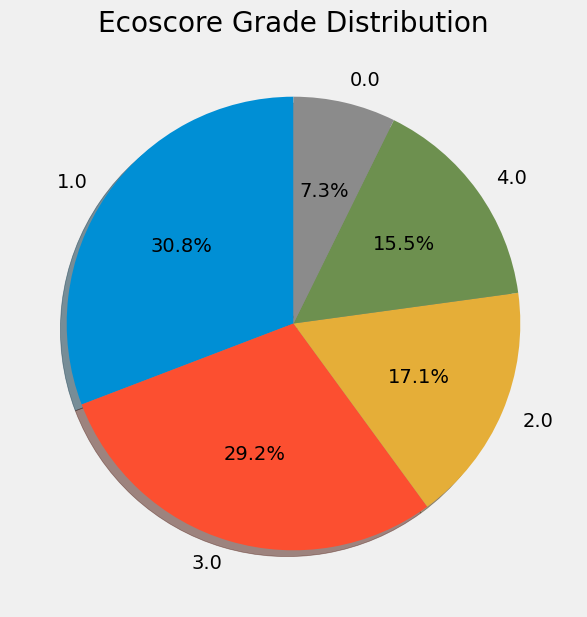

In [31]:
plt.figure(figsize=(7, 7))

plt.pie(ecoscore_grade.value_counts(), labels=ecoscore_grade.value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ecoscore Grade Distribution')

plt.show()

## XGBoost

This model is a gradient boosted tree, which is a very powerful model for classification and regression problems. It's getting more and more popular because it is really fast and accurate.

Given that our test set is not labeled, we will split our train set into train and test set. We will use the test set to evaluate our model.

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data_numerical_train = data_train.loc[:,list(numerical_set_eco)]
data_numerical_test = data_test.loc[:, list(numerical_set_eco)]

data_categorical_train = data_train.loc[:,categorical_set]
data_categorical_test = data_test.loc[:,categorical_set]

# Concatenating dataframes
train = np.concatenate([data_numerical_train, np.array(data_categorical_train)], axis=1)
test = np.concatenate([data_numerical_test,np.array(data_categorical_test)], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train, ecoscore_grade, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Creation and fitting the XGBClassifier
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'The F1-score in XGBClassifier is : {f1}')

The F1-score in XGBClassifier is : 0.8526376553409657


In [34]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(data_train, ecoscore_grade)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [35]:
y_pred_test = xgb.predict(data_test)
y_pred_test

array([1, 2, 1, ..., 1, 3, 1])

In [36]:
string = '{"target" : {'
counter = 0
for y in y_pred_test:
    string += f'"{counter}" : {y},'
    counter += 1
string += '} }'

with open('predictions.json', 'w') as file:
    file.write(string)

## Feedforward Neural Network

As our data is sequencial and we only have this tabulated information I decided to work with this type of neural network as it is one of the simpliests.

In [37]:
new_dt = data_train.drop('main_ingredient', axis=1)
new_test_dt = data_test.drop('main_ingredient', axis=1)
#new_dt = data_train.drop('main_category', axis=1)
#new_test_dt = data_test.drop('main_category', axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_dt, ecoscore_grade, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [38]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = {i: class_weights[i] for i in range(0,5)}
print(weights)

{0: 2.6883870967741936, 1: 0.6479300291545189, 2: 1.166410076976907, 3: 0.6890450599421248, 4: 1.288596830305373}


In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Convert the target variable to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)

# Define the input shape
input_shape = X_train.shape[1:]

# Input layer
input_layer = Input(shape=input_shape)

# Hidden layers
neurons = 11000
d1 = Dense(units=neurons, activation='relu')(input_layer)
d2 = Dense(units=neurons, activation='relu')(d1)
d3 = Dense(units=neurons, activation='relu')(d2)

# Output layer
output_layer = Dense(5, activation='softmax')(d3)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Metrics
METRICS = ['accuracy',
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')]

# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=METRICS
    )

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 77)]              0         
                                                                 
 dense (Dense)               (None, 11000)             858000    
                                                                 
 dense_1 (Dense)             (None, 11000)             121011000 
                                                                 
 dense_2 (Dense)             (None, 11000)             121011000 
                                                                 
 dense_3 (Dense)             (None, 5)                 55005     
                                                                 
Total params: 242,935,005
Trainable params: 242,935,005
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fitting
print('Training...')
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=30,
    class_weight = weights
)
print('Training Process Finished')

Training...
Epoch 1/30
521/521 [==============================] - 31s 53ms/step - loss: 0.9232 - accuracy: 0.5937 - precision: 0.6771 - recall: 0.4566
Epoch 2/30
521/521 [==============================] - 28s 53ms/step - loss: 0.7690 - accuracy: 0.6747 - precision: 0.7168 - recall: 0.6087
Epoch 3/30
521/521 [==============================] - 28s 54ms/step - loss: 0.7199 - accuracy: 0.6982 - precision: 0.7355 - recall: 0.6450
Epoch 4/30
521/521 [==============================] - 28s 53ms/step - loss: 0.6926 - accuracy: 0.7077 - precision: 0.7424 - recall: 0.6503
Epoch 5/30
521/521 [==============================] - 29s 55ms/step - loss: 0.6610 - accuracy: 0.7147 - precision: 0.7576 - recall: 0.6556
Epoch 6/30
521/521 [==============================] - 29s 55ms/step - loss: 0.6309 - accuracy: 0.7264 - precision: 0.7676 - recall: 0.6663
Epoch 7/30
521/521 [==============================] - 28s 53ms/step - loss: 0.6041 - accuracy: 0.7369 - precision: 0.7767 - recall: 0.6808
Epoch 8/30
521/

In [41]:
# Convert the target variable to one-hot encoded format
y_test_encoded = to_categorical(y_test, num_classes=5)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test_encoded)

# Compute F1-score manually
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print("Test F1-score:", test_f1)

131/131 [==============================] - 2s 9ms/step - loss: 0.5352 - accuracy: 0.8073 - precision: 0.8123 - recall: 0.8006
Test F1-score: 0.8063814364242025


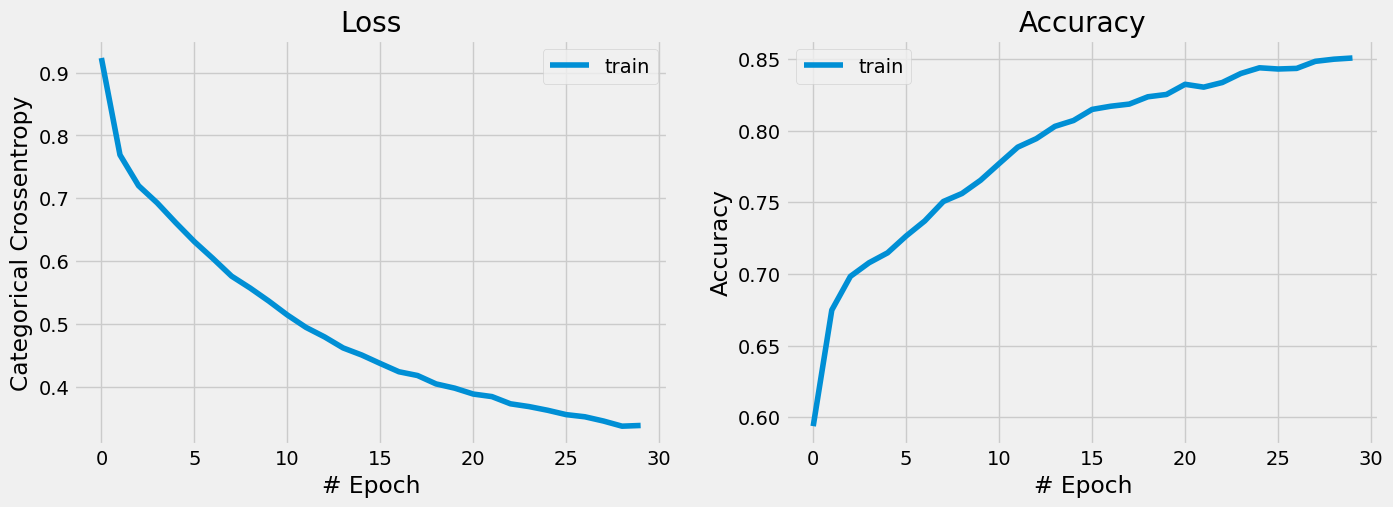

In [42]:
plt.rcParams['figure.figsize'] = (15,5)

fig, ax = plt.subplots(1,2)

ax[0].set_xlabel("# Epoch")
ax[0].set_ylabel('Categorical Crossentropy')
#ax[0].plot(history.history['val_loss'])
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss')
ax[0].legend(['train', 'val'])

ax[1].set_xlabel("# Epoch")
ax[1].set_ylabel('Accuracy')
#ax[1].plot(history.history['val_accuracy'])
ax[1].plot(history.history['accuracy'])
ax[1].set_title('Accuracy')
ax[1].legend(['train', 'val'])

plt.show()

In [43]:
predictions = model.predict(new_test_dt)
y_pred = [np.argmax(pred) for pred in predictions]

40/40 [==============================] - 0s 6ms/step


In [44]:
string = '{"target" : {'
counter = 0
for i in y_pred:
    string += f'"{counter}" : {i},'
    counter += 1
string += '} }'

with open('predictions_nn.json', 'w') as file:
    file.write(string)